In [1]:
import os

os.environ[
    "OMP_NUM_THREADS"
] = "64"  # for jupyter.nersc.gov otherwise the notebook only uses 2 cores
# should set before loading numpy 
import numpy as np

In [2]:
import pymaster as nmt
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from matplotlib.lines import Line2D

In [4]:
import seaborn as sns

sns.set_context("talk")
# sns.set()
sns.set_style("ticks")

import matplotlib as mpl
mpl.rc('image', cmap='coolwarm')

In [5]:
import healpy as hp
import pysm3
import pysm3.units as u

In [6]:
from pathlib import Path

# load the final maps at 3amin

In [7]:
save_fits = ['/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NN_out_Q_3amin_from_20amin_physical_units_20x20_1280_norm_with_13amin_full_sky.fits', 
             '/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NN_out_U_3amin_from_20amin_physical_units_20x20_1280_norm_with_13amin_full_sky.fits']
mapQ_3amin = hp.read_map(save_fits[0])
mapU_3amin = hp.read_map(save_fits[1])
maps_3amin = np.array((mapQ_3amin, mapU_3amin))

In [8]:
maps_3amin_2048 = np.array((hp.ud_grade(mapQ_3amin, nside_out = 2048), hp.ud_grade(mapU_3amin, nside_out = 2048)))

In [9]:
maps_80amin = hp.read_map('/pscratch/sd/j/jianyao/COM_CompMap_IQU-thermaldust-gnilc-unires_2048_R3.00.fits', field = None)[1:3]*1e6 
#K_CMB to uK_CMB

maps_12amin = hp.read_map('/global/cfs/cdirs/sobs/www/users/ForSE/fullsky_maps/forse_QU_thermaldust_12amin_2048_v0.fits', field = None)

In [10]:
planck_mask = hp.read_map('/pscratch/sd/j/jianyao/HFI_Mask_GalPlane-apo2_2048_R2.00.fits', field = None)

In [11]:
poltens = hp.read_map('/pscratch/sd/j/jianyao/dust_gnilc_varres_pysm_circles_uK_RJ_lmax_6143_nside_2048.fits', field = None)/0.07748637 # from uK_RJ to uK_CMB
# 2048

In [12]:
poltens_3amin = pysm3.apply_smoothing_and_coord_transform(poltens, fwhm=3*u.arcmin)

In [13]:
poltens_3amin_512 =  np.array((hp.ud_grade(poltens_3amin[1], nside_out = 512), hp.ud_grade(poltens_3amin[2], nside_out = 512)))

In [14]:
np.save('/pscratch/sd/j/jianyao/gnilc_dust_template_nside512_uK_CMB_rd_0204.npy', poltens_3amin_512)

In [60]:
poltens_3amin = poltens_3amin[1:]

In [61]:
poltens_3amin.shape

(2, 50331648)

In [186]:
4.25*0.07748637*0.07748637

0.02551758452705182

# Map-level validation

## full-sky

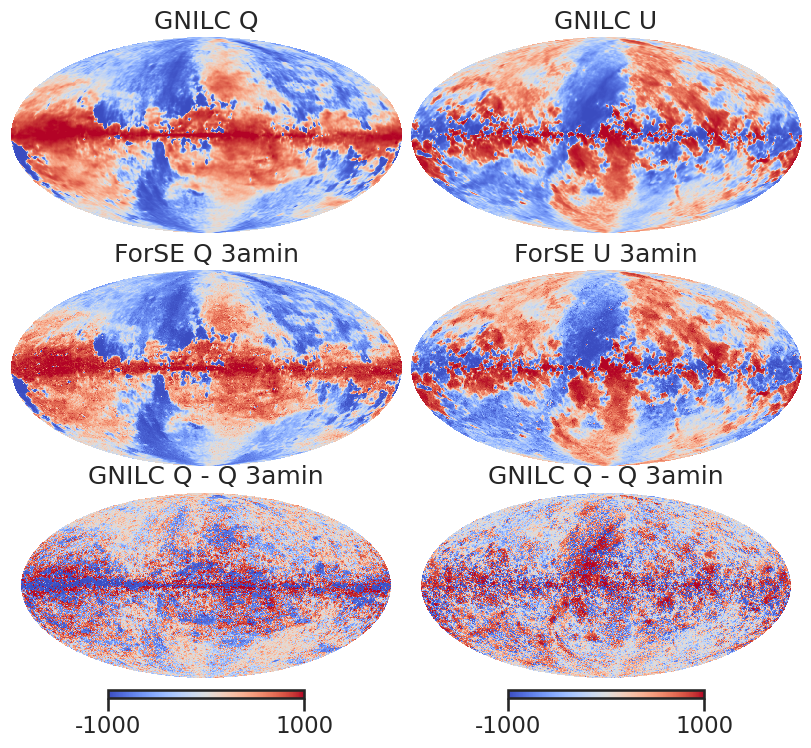

In [337]:
plt.figure(figsize = (8, 7))
hp.mollview(maps_80amin[0], sub = 321, title = 'GNILC Q', norm = 'hist', cmap='coolwarm', min = -1000, max = 1000, cbar=False)
hp.mollview(maps_80amin[1], sub = 322, title = 'GNILC U', norm = 'hist', cmap='coolwarm', min = -1000, max = 1000, cbar=False)
hp.mollview(maps_3amin[0], sub = 323, title = 'ForSE Q 3amin', norm = 'hist', cmap='coolwarm', min = -1000, max = 1000, cbar=False)
hp.mollview(maps_3amin[1], sub = 324, title = 'ForSE U 3amin', norm = 'hist', cmap='coolwarm', min = -1000, max = 1000, cbar=False)
hp.mollview(maps_3amin_2048[0] - maps_80amin[0], sub = 325, title = 'GNILC Q - Q 3amin', norm = 'hist', cmap='coolwarm', min = -1000, max = 1000)
hp.mollview(maps_3amin_2048[1] - maps_80amin[1], sub = 326, title = 'GNILC Q - Q 3amin', norm = 'hist', cmap='coolwarm', min = -1000, max = 1000)

## for a spefific patch

In [70]:
bkmaskfile = Path('/pscratch/sd/j/jianyao/bk14_mask_gal_n0512.fits')
if not bkmaskfile.exists():
    !wget -O $bkmaskfile http://bicepkeck.org/BK14_datarelease/bk14_mask_gal_n0512.fits

In [72]:
maskbk= hp.read_map(bkmaskfile , verbose=False)
# idx = np.where((maskbk < 0) | (~np.isfinite(maskbk)))
# maskbk [idx] = 0

In [73]:
maps_80amin_512 = np.array((hp.ud_grade(maps_80amin[0], nside_out = 512), hp.ud_grade(maps_80amin[1], nside_out = 512)))
maps_3amin_512 = np.array((hp.ud_grade(mapQ_3amin, nside_out = 512), hp.ud_grade(mapU_3amin, nside_out = 512)))

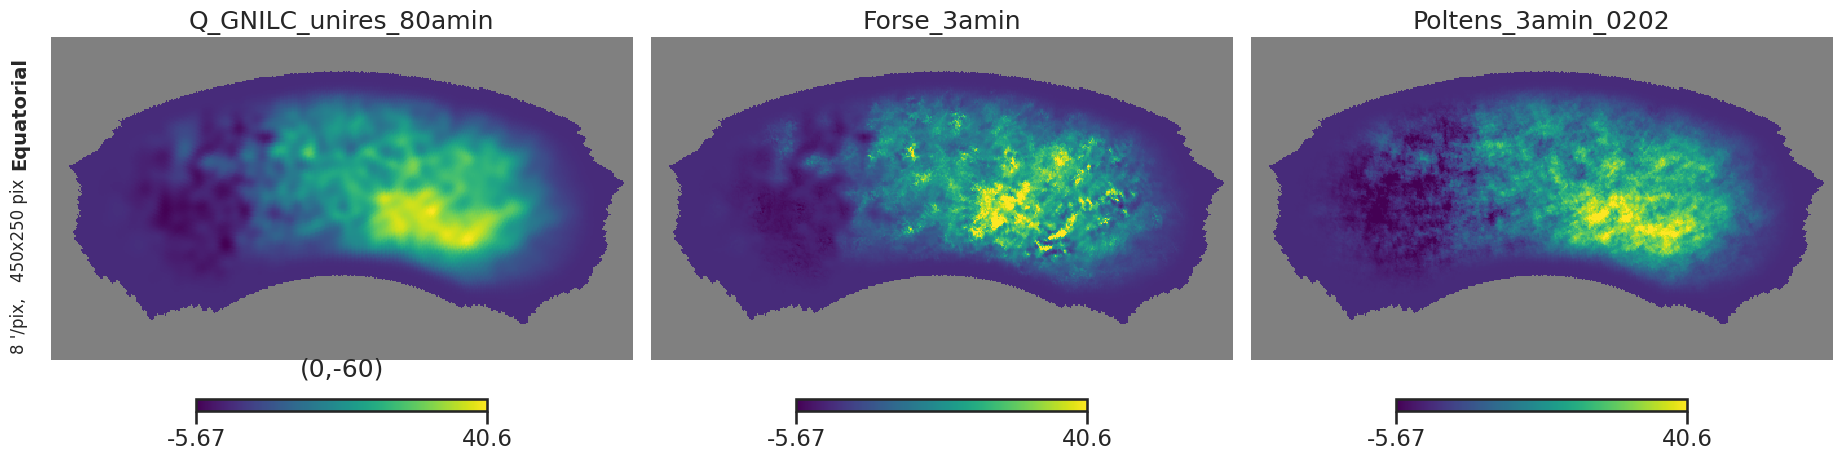

In [74]:
plt.figure(figsize = (18, 5))
hp.gnomview(maps_80amin_512[0]*maskbk,reso=8, xsize=450,ysize=250, coord=['G', 'C'] ,rot=[0,-60], sub = 131, cmap = 'viridis', title = 'Q_GNILC_unires_80amin')
hp.gnomview(maps_3amin_512[0]*maskbk,reso=8, xsize=450,ysize=250, coord=['G', 'C'] ,rot=[0,-60], sub = 132, min = -5.67, max = 40.6, cmap = 'viridis', title = 'Forse_3amin', notext = True)
hp.gnomview(poltens_3amin_512[0]*maskbk,reso=8, xsize=450,ysize=250, coord=['G', 'C'] ,rot=[0,-60], sub = 133, min = -5.67, max = 40.6, cmap = 'viridis', title = 'Poltens_3amin_0202', notext = True)

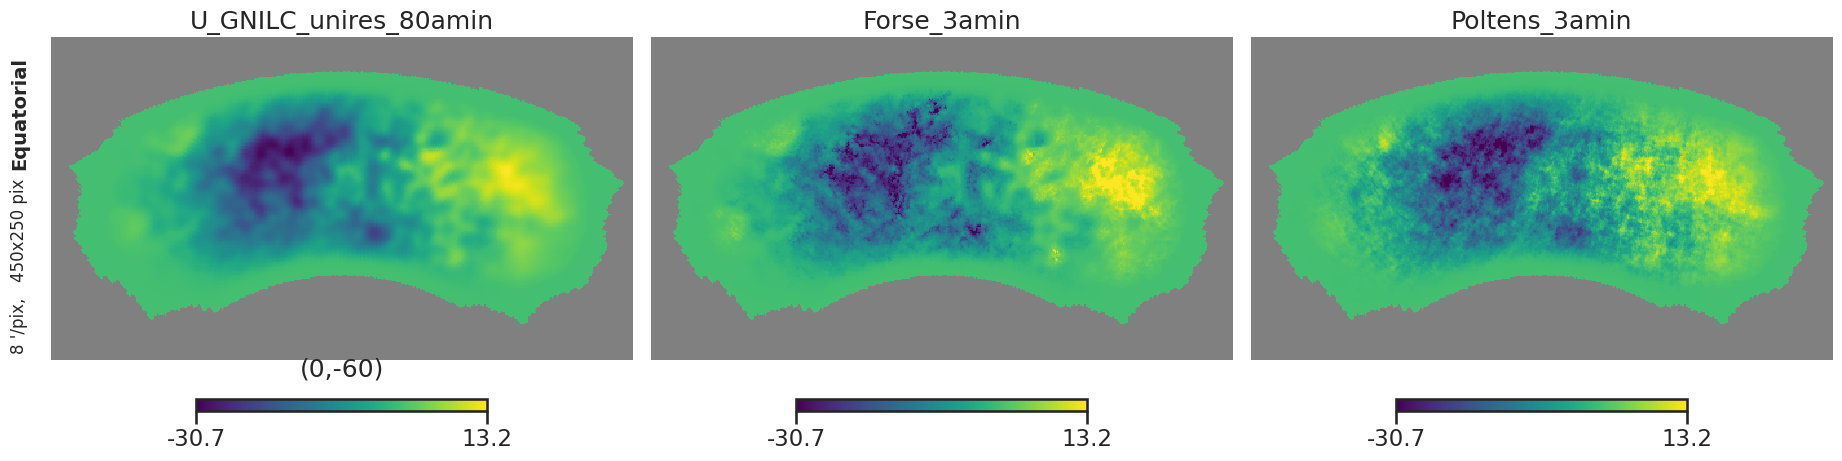

In [75]:
plt.figure(figsize = (18, 5))
hp.gnomview(maps_80amin_512[1]*maskbk,reso=8, xsize=450,ysize=250, coord=['G', 'C'] ,rot=[0,-60], sub = 131, cmap = 'viridis', title = 'U_GNILC_unires_80amin')
hp.gnomview(maps_3amin_512[1]*maskbk,reso=8, xsize=450,ysize=250, coord=['G', 'C'] ,rot=[0,-60], sub = 132, min = -30.7, max = 13.2, cmap = 'viridis', title = 'Forse_3amin', notext = True)
hp.gnomview(poltens_3amin_512[1]*maskbk,reso=8, xsize=450,ysize=250, coord=['G', 'C'] ,rot=[0,-60], sub = 133, min = -30.7, max = 13.2, cmap = 'viridis', title = 'Poltens_3amin', notext = True)

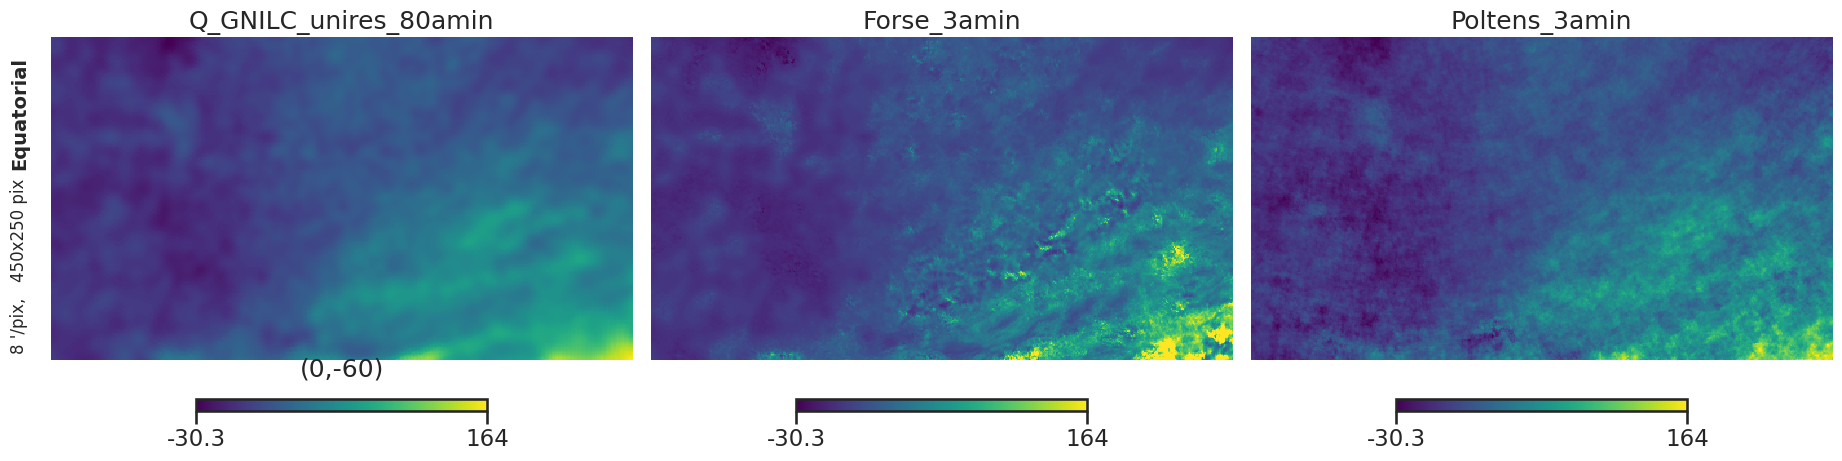

In [76]:
plt.figure(figsize = (18, 5))
hp.gnomview(maps_80amin_512[0],reso=8, xsize=450,ysize=250, coord=['G', 'C'] ,rot=[0,-60], sub = 131, cmap = 'viridis', title = 'Q_GNILC_unires_80amin')
hp.gnomview(maps_3amin_512[0],reso=8, xsize=450,ysize=250, coord=['G', 'C'] ,rot=[0,-60], sub = 132, min = -30.3, max = 164, cmap = 'viridis', title = 'Forse_3amin', notext = True)
hp.gnomview(poltens_3amin_512[0],reso=8, xsize=450,ysize=250, coord=['G', 'C'] ,rot=[0,-60], sub = 133, min = -30.3, max = 164, cmap = 'viridis', title = 'Poltens_3amin', notext = True)

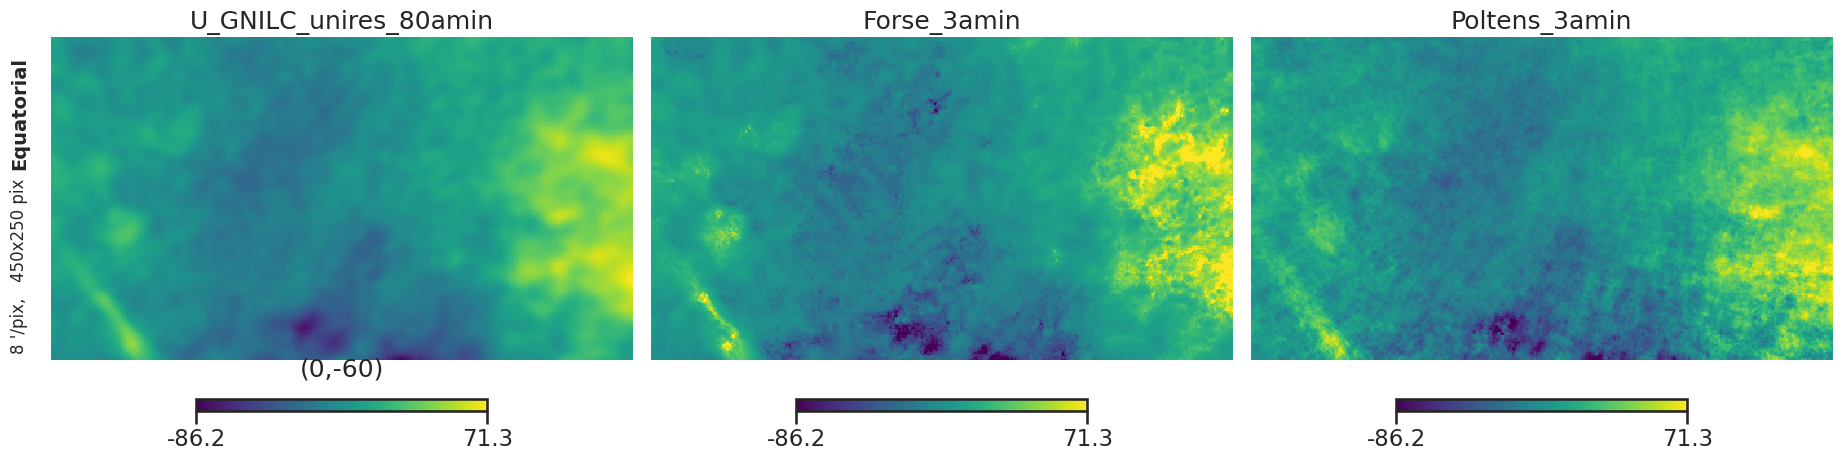

In [77]:
plt.figure(figsize = (18, 5))
hp.gnomview(maps_80amin_512[1],reso=8, xsize=450,ysize=250, coord=['G', 'C'] ,rot=[0,-60], sub = 131, cmap = 'viridis', title = 'U_GNILC_unires_80amin')
hp.gnomview(maps_3amin_512[1],reso=8, xsize=450,ysize=250, coord=['G', 'C'] ,rot=[0,-60], sub = 132, min = -86.2, max = 71.3, cmap = 'viridis', title = 'Forse_3amin', notext = True)
hp.gnomview(poltens_3amin_512[1],reso=8, xsize=450,ysize=250, coord=['G', 'C'] ,rot=[0,-60], sub = 133, min = -86.2, max = 71.3, cmap = 'viridis', title = 'Poltens_3amin', notext = True)

# power spectral- level validation

## cls for different fraction of sky using Planck mask

In [22]:
lmax = 4096; 
lmax_max = 8192

In [23]:
nside = 4096

In [24]:
ells_full_3amin, cl_full_3amin = cl_anafast(maps_3amin_2048, lmax = lmax)
cl_full_3amin_pt = hp.anafast(poltens_3amin, lmax = lmax)[:, 2:]

In [25]:
ells_full_80amin, cl_full_80amin = cl_anafast(maps_80amin, lmax = lmax)
ells_full_12amin, cl_full_12amin = cl_anafast(maps_12amin, lmax = lmax)

In [26]:
#transform output from hp.anafast to output from namaster
cl_full_80amin_na = [cl_full_80amin[1], cl_full_80amin[4], cl_full_80amin[4], cl_full_80amin[2]]
cl_full_12amin_na = [cl_full_12amin[1], cl_full_12amin[4], cl_full_12amin[4], cl_full_12amin[2]]
cl_full_3amin_na = [cl_full_3amin[1], cl_full_3amin[4], cl_full_3amin[4], cl_full_3amin[2]]

cl_full_pt_na = [cl_full_3amin_pt[1], cl_full_3amin_pt[4], cl_full_3amin_pt[4], cl_full_3amin_pt[2]]

In [37]:
hp.get_nside(poltens_3amin)

2048

In [36]:
hp.get_nside(maps_3amin_2048)

2048

In [62]:
# ell_80p_80amin, cl_80p_80amin = cl_nmt(2048, planck_mask[4], maps_80amin,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_80_sky.fits')
# ell_80p_12amin, cl_80p_12amin = cl_nmt(2048, planck_mask[4], maps_12amin,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_80_sky.fits')

# w22_file_80p = '/pscratch/sd/j/jianyao/w22_2048_80_sky_lmax_4096_nbins_40.fits'
# ell_80p_3amin, cl_80p_3amin = cl_nmt(2048, planck_mask[4], maps_3amin_2048,lmax = lmax, nlbins = 40, w22_file = w22_file_80p)
ell_80p_3amin, cl_80p_pd_3amin = cl_nmt(2048, planck_mask[4], poltens_3amin,lmax = lmax, nlbins = 40, w22_file = w22_file_80p)

# ell_40p_80amin, cl_40p_80amin = cl_nmt(2048, planck_mask[1], maps_80amin,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_40_sky.fits')
# ell_40p_12amin, cl_40p_12amin = cl_nmt(2048, planck_mask[1], maps_12amin,lmax = 3000, nlbins = 30, w22_file = '/pscratch/sd/j/jianyao/w22_2048_40_sky.fits')

# w22_file_40p = '/pscratch/sd/j/jianyao/w22_2048_40_sky_lmax_4096_nbins_40.fits'
# ell_40p_3amin, cl_40p_3amin = cl_nmt(2048, planck_mask[1], maps_3amin_2048,lmax = lmax, nlbins = 40, w22_file = w22_file_40p)
ell_40p_3amin, cl_40p_pd_3amin = cl_nmt(2048, planck_mask[1], poltens_3amin,lmax = lmax, nlbins = 40, w22_file = w22_file_40p)

weights loaded from /pscratch/sd/j/jianyao/w22_2048_80_sky_lmax_4096_nbins_40.fits
weights loaded from /pscratch/sd/j/jianyao/w22_2048_40_sky_lmax_4096_nbins_40.fits


In [31]:
# ell_80p_80amin = ell_80p_12amin = ell_40p_80amin = ell_40p_12amin = nmt.NmtBin(nside=2048, nlb=30, lmax=lmax, is_Dell=False).get_effective_ells()

# ell_80p_3amin = ell_40p_3amin = nmt.NmtBin(nside=2048, nlb=40, lmax=lmax, is_Dell=dl).get_effective_ells()

# ells_full_3amin = ells_full_12amin = ells_full_80amin = np.arange(lmax+1)

In [63]:
cls_full_80amin = {'ells':ells_full_80amin, 'spectra':cl_full_80amin_na, 'color':'k-', 'label':'80\''}
cls_full_12amin = {'ells':ells_full_12amin, 'spectra':cl_full_12amin_na, 'color':'b-', 'label':'12\''}
cls_full_3amin = {'ells':ells_full_3amin, 'spectra':cl_full_3amin_na, 'color':'r-', 'label':'3\''}
cls_full_pt = {'ells':ells_full_3amin, 'spectra':cl_full_pt_na, 'color':'g-', 'label':'Pol-3\''}

cls_80p_80amin = {'ells':ell_80p_80amin, 'spectra':cl_80p_80amin, 'color':'k-.', 'label':''}
cls_80p_12amin = {'ells':ell_80p_12amin, 'spectra':cl_80p_12amin, 'color':'b-.', 'label':''}
cls_80p_3amin = {'ells':ell_80p_3amin, 'spectra':cl_80p_3amin, 'color':'r-.', 'label':''}
cls_80p_pt = {'ells':ell_80p_3amin, 'spectra':cl_80p_pd_3amin, 'color':'g-.', 'label':''}

cls_40p_80amin = {'ells':ell_40p_80amin, 'spectra':cl_40p_80amin, 'color':'k--', 'label':''}
cls_40p_12amin = {'ells':ell_40p_12amin, 'spectra':cl_40p_12amin, 'color':'b--', 'label':''}
cls_40p_3amin = {'ells':ell_40p_3amin, 'spectra':cl_40p_3amin, 'color':'r--', 'label':''}
cls_40p_pt = {'ells':ell_40p_3amin, 'spectra':cl_40p_pd_3amin, 'color':'g--', 'label':''}

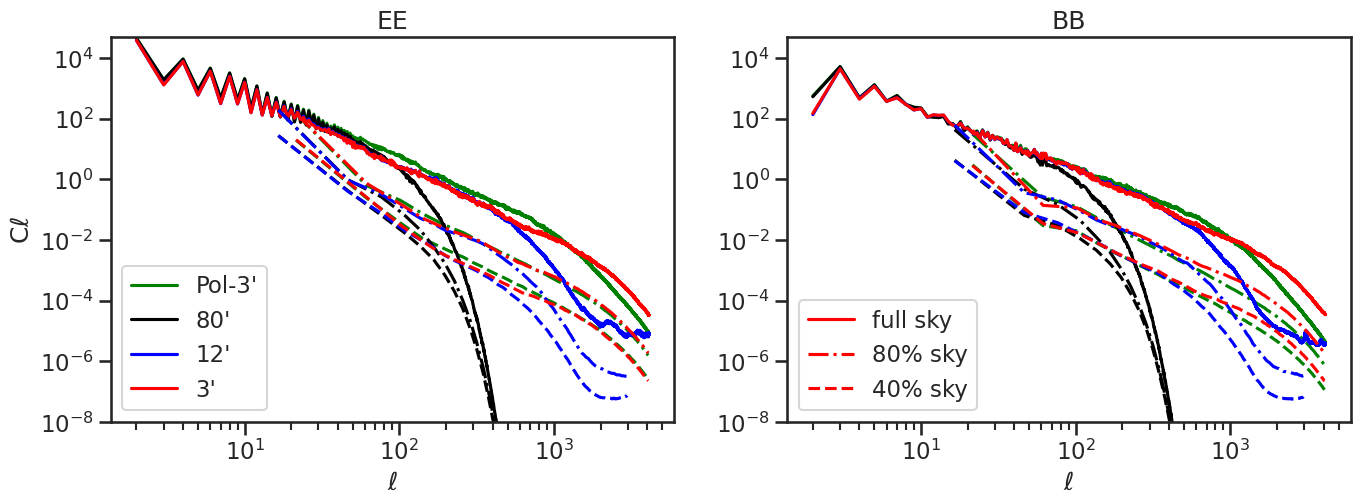

In [64]:
cls_all = [cls_full_pt, cls_80p_pt, cls_40p_pt, cls_full_80amin, cls_full_12amin, cls_full_3amin, cls_80p_80amin, cls_80p_12amin, cls_80p_3amin, cls_40p_80amin, cls_40p_12amin, cls_40p_3amin]
names = ['EE', 'BB']
plot_spectra(cls_all, names, save_dir = False,lim = [1e-8, 5e4])

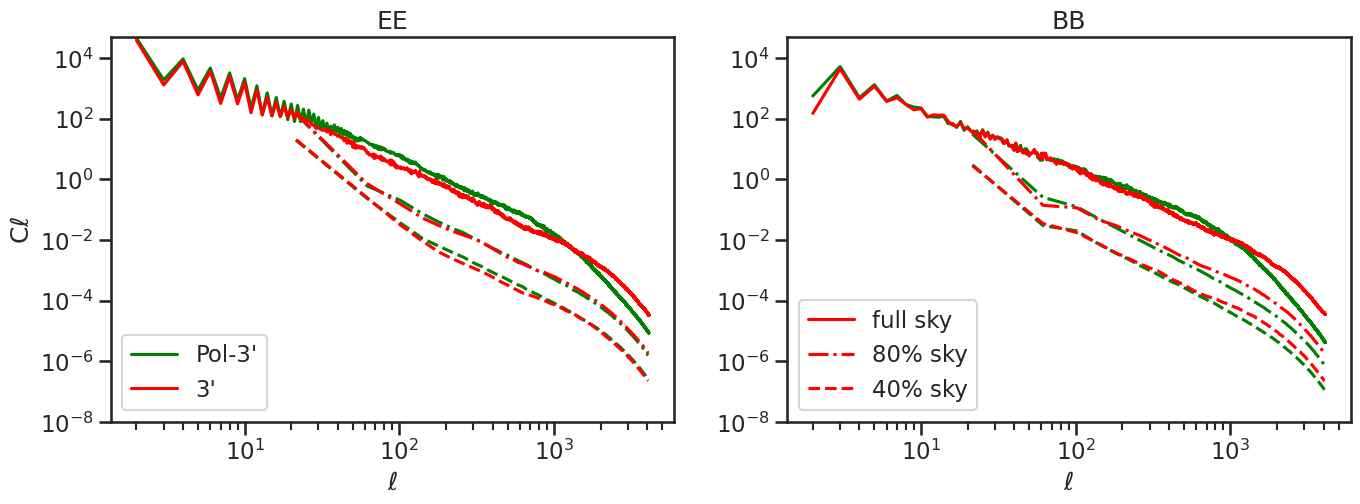

In [65]:
cls_all = [cls_full_pt, cls_80p_pt, cls_40p_pt, cls_full_3amin, cls_80p_3amin, cls_40p_3amin]
names = ['EE', 'BB']
plot_spectra(cls_all, names, save_dir = False,lim = [1e-8, 5e4])

In [67]:
np.savez('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/Times_13amin_cl_80p_sky_maps_at_3_resolutions_0204.npz', cl80amin = cls_80p_80amin, cl12amin = cls_80p_12amin, cl3amin = cls_80p_3amin, clpt3amin = cls_80p_pt)
np.savez('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/Times_13amin_cl_40p_sky_maps_at_3_resolutions_0204.npz', cl80amin = cls_40p_80amin, cl12amin = cls_40p_12amin, cl3amin = cls_40p_3amin, clpt3amin = cls_40p_pt)
np.savez('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/Times_13amin_cl_100p_sky_maps_at_3_resolutions_0204.npz', cl80amin = cls_full_80amin, cl12amin = cls_full_80amin, cl3amin = cls_full_3amin, clpt3amin = cls_full_pt)

# data_test = np.load('test.npz', allow_pickle=True)
# data_test.files
# data_test['cl_80amin'].item()

In [37]:


cl_forse_100p = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/Times_13amin_cl_100p_sky_maps_at_3_resolutions.npz', allow_pickle = True)
cl_forse_80p = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/Times_13amin_cl_80p_sky_maps_at_3_resolutions.npz', allow_pickle = True)
cl_forse_40p = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/Times_13amin_cl_80p_sky_maps_at_3_resolutions.npz', allow_pickle = True)

cl_full_80amin_na = cl_forse_100p['cl80amin']; 
cl_full_12amin_na = cl_forse_100p['cl12amin']; 
cl_full_3amin_na = cl_forse_100p['cl3amin']; 

cl_80p_80amin_na = cl_forse_80p['cl80amin']; 
cl_full_12amin_na = cl_forse_80p['cl12amin']; 
cl_80p_3amin_na = cl_forse_80p['cl3amin']; 

cl_f40p_80amin_na = cl_forse_40p['cl80amin']; 
cl_f40p_12amin_na = cl_forse_40p['cl12amin']; 
cl_f40p_3amin_na = cl_forse_40p['cl3amin']; 
# data_test = np.load('test.npz', allow_pickle=True)
# data_test.files
# data_test['cl_80amin'].item()

Text(0.5, 0.98, 'Full-sky power spectra, lmax = 4096')

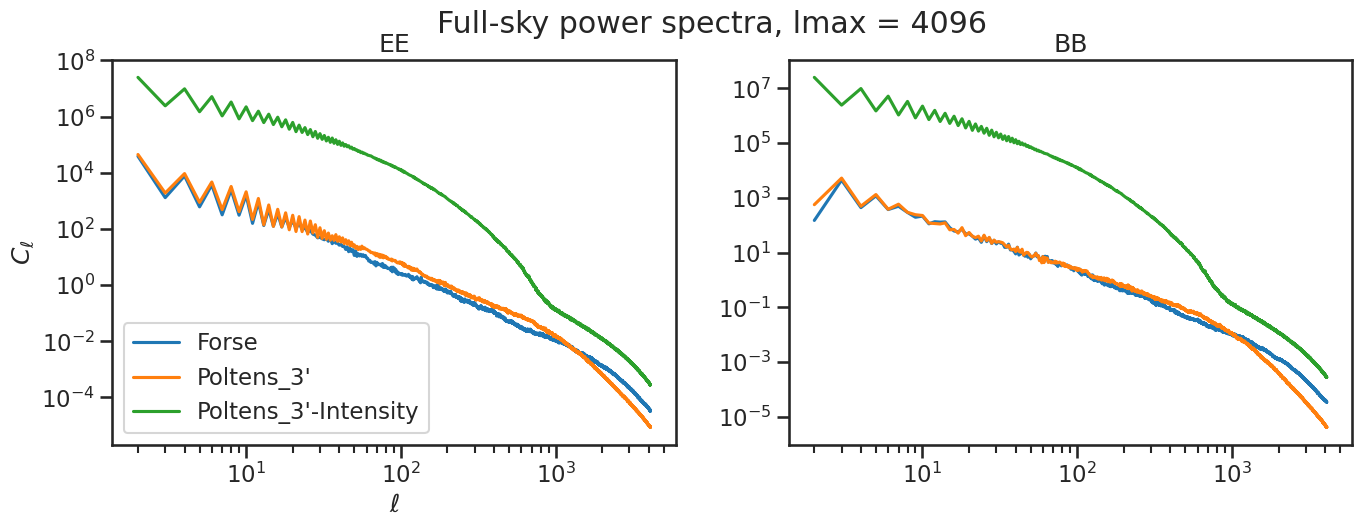

In [69]:
fig, axes = plt.subplots(1,2, figsize = (16,5))
axes[0].loglog(ells_full_3amin, cl_full_3amin[1], label = 'Forse')
axes[0].loglog(ells_full_3amin, cl_full_3amin_pt[1], label = 'Poltens_3\'')
axes[0].loglog(ells_full_3amin, cl_full_3amin_pt[0], label = 'Poltens_3\'-Intensity')
axes[0].legend()
axes[0].set_xlabel('$\ell$'); axes[0].set_ylabel('$C_\ell$'); 
axes[0].set_title('EE')

axes[1].loglog(ells_full_3amin, cl_full_3amin[2])
axes[1].loglog(ells_full_3amin, cl_full_3amin_pt[2])
axes[1].loglog(ells_full_3amin, cl_full_3amin_pt[0])
axes[1].set_title('BB')
fig.suptitle('Full-sky power spectra, lmax = 4096')

## smoothing due to reprojection

In [339]:
import sys
sys.path.append('../foreground_non_gaussianity/')
from mix_tools import *
from projection_tools import *

In [351]:
lonlat = np.load('/pscratch/sd/j/jianyao/lat_lon.npz')

lon = lonlat['lon']
lat = lonlat['lat']

maps_3amin_patch_Q = np.ones((174, 1280, 1280))
maps_3amin_patch_U = np.ones((174, 1280, 1280))

for i in range(174):
    header = set_header(lon[i],lat[i], size_patch=3.75/60/4, Npix=1280)
    maps_3amin_patch_Q[i] = h2f(maps_3amin[0], header)
    maps_3amin_patch_U[i] = h2f(maps_3amin[1], header)

In [343]:
patches_NN_Q = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NN_out_Q_3amin_from_20amin_physical_units_20x20_1280_norm_with_13amin.npy')
patches_NN_U = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/NN_out_U_3amin_from_20amin_physical_units_20x20_1280_norm_with_13amin.npy')

In [344]:
patches_NN_Q.shape

(174, 1280, 1280)

In [358]:
Lx = np.radians(20.); Ly = np.radians(20.)        
mask_1280 = np.load('mask_1280*1280.npy')

l0_bins = np.arange(20, 3000, 40); lf_bins = np.arange(20, 3000, 40)+39
b = nmt.NmtBinFlat(l0_bins, lf_bins)
ells_uncoupled = b.get_effective_ells()

w22_file = 'w22_flat_1280_1280_lmax3000.fits'
w22 = nmt.NmtWorkspaceFlat()
try:
    w22.read_from(w22_file)
    print('weights loaded from %s' % w22_file) 
except:
    print('False')

cls_ori = []; cls_aft = []; 

for i in range(174):
    f_NN_ori = nmt.NmtFieldFlat(Lx, Ly, mask_1280, [patches_NN_Q[i], patches_NN_U[i]], purify_b=True) 
    f_NN_aft = nmt.NmtFieldFlat(Lx, Ly, mask_1280, [maps_3amin_patch_Q[i], maps_3amin_patch_U[i]], purify_b=True) 
    
    cl_NN_coupled = nmt.compute_coupled_cell_flat(f_NN_ori, f_NN_ori, b)
    cl_NN_uncoupled = w22.decouple_cell(cl_NN_coupled)     
    cls_ori.append(cl_NN_uncoupled)  

    cl_NN_coupled_aft = nmt.compute_coupled_cell_flat(f_NN_aft, f_NN_aft, b)
    cl_NN_uncoupled_aft = w22.decouple_cell(cl_NN_coupled_aft)     
    cls_aft.append(cl_NN_uncoupled_aft)  


weights loaded from w22_flat_1280_1280_lmax3000.fits


In [405]:
lat_all = [90.0, 72.0, 54.0, 36.0, 18.0, 0.0]
ratio = []
for i in range(6):
    index = np.where(abs(lat) == lat_all[i])
    ratio_i = np.zeros(75)
    for j in index[0]: # patches belonging to the same latitude
        ratio_i += cls_ori[j][0]/cls_aft[j][0]
    
    ratio.append(ratio_i/len(index[0]))
        

Text(0, 0.5, 'ratio')

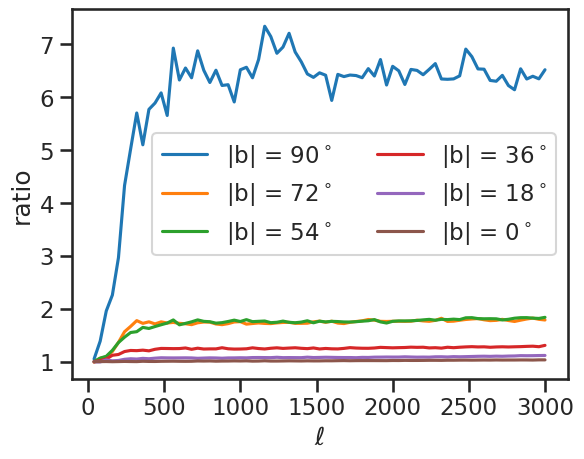

In [418]:
for i in range(6):
    plt.plot(ells_uncoupled, ratio[i], label = '|b| = %d$^\circ$'%lat_all[i])
plt.legend(ncol = 2)
plt.xlabel('$\ell$')
plt.ylabel('ratio')

## E/B ratio

(0.0, 4.0)

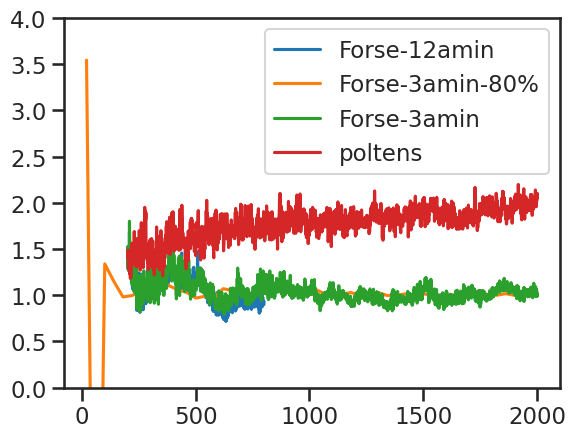

In [232]:
plt.plot(ells_full_12amin[200:800],  cl_full_12amin[1][200:800]/cl_full_12amin[2][200:800], label = 'Forse-12amin')

# plt.plot(ell_80p_12amin,  cl_80p_12amin[0]/cl_80p_12amin[3], label = 'Forse-12amin-80%')
plt.plot(ell_80p_3amin[0:50],  cl_80p_3amin[0][0:50]/cl_80p_3amin[3][0:50], label = 'Forse-3amin-80%')

plt.plot(ells_full_3amin[200:2000],  cl_full_3amin[1][200:2000]/cl_full_3amin[2][200:2000], label = 'Forse-3amin')
plt.plot(ells_full_3amin[200:2000],  cl_full_3amin_pt[1][200:2000]/cl_full_3amin_pt[2][200:2000], label = 'poltens')
plt.legend()
plt.ylim(0, 4)

## fit the power law for the full-sky 

In [78]:
from scipy.optimize import curve_fit

In [79]:
def model(ell, A, gamma):
    out = A * (ell/80) ** gamma
    
    return out

In [83]:
def fit_power_law(cl_full_3amin, cl_80p_3amin, cl_40p_3amin):
    
    fit_min = 200; fit_max = 1500

    xdata = np.arange(fit_min, fit_max)
    y_EE = cl_full_3amin[1][fit_min-2:fit_max-2]
    y_BB = cl_full_3amin[2][fit_min-2:fit_max-2]
    
    (A_d_EE, gamma_EE), cov_EE = curve_fit(model, xdata, y_EE)
    (A_d_BB, gamma_BB), cov_BB = curve_fit(model, xdata, y_BB)
    (A_d_EE_80p, gamma_EE_80p), cov_EE = curve_fit(model, ell_80p_3amin[5: 38], cl_80p_3amin[0][5: 38])
    (A_d_BB_80p, gamma_BB_80p), cov_BB = curve_fit(model, ell_80p_3amin[5: 38], cl_80p_3amin[3][5: 38])

    (A_d_EE_40p, gamma_EE_40p), cov_EE = curve_fit(model, ell_40p_3amin[5: 38], cl_40p_3amin[0][5: 38])
    (A_d_BB_40p, gamma_BB_40p), cov_BB = curve_fit(model, ell_40p_3amin[5: 38], cl_40p_3amin[3][5: 38])

    plt.figure(figsize = (16, 5))
    plt.subplot(121)
    plt.loglog(ells_full_3amin, model(ells_full_3amin, A_d_EE, gamma_EE), 'g--', label = r'$A_d = %.2f, \alpha$ = %.2f'%(A_d_EE, gamma_EE))
    plt.loglog(ells_full_3amin, cl_full_3amin[1], 'r-', alpha = 0.6)

    plt.loglog(ell_80p_3amin, model(ell_80p_3amin, A_d_EE_80p, gamma_EE_80p), 'b--', label = r'$A_d = %.2f, \alpha$ = %.2f'%(A_d_EE_80p, gamma_EE_80p))
    plt.loglog(ell_80p_3amin, cl_80p_3amin[0], 'r-', alpha = 0.6)

    plt.loglog(ell_40p_3amin, model(ell_40p_3amin, A_d_EE_40p, gamma_EE_40p), 'k--', label = r'$A_d = %.2f, \alpha$ = %.2f'%(A_d_EE_40p, gamma_EE_40p))
    plt.loglog(ell_40p_3amin, cl_40p_3amin[0], 'r-', alpha = 0.6)

    plt.axvline(fit_min, linestyle="--", color="gray")
    plt.axvline(fit_max, linestyle="--", color="gray")
    plt.legend(); plt.title(r'EE; $C_\ell = (A_d/80)^\alpha$'); plt.ylabel('$C_\ell, \mu K_{\mathrm{CMB}}^2$'); plt.xlabel('$\ell$')

    plt.subplot(122)
    plt.loglog(ells_full_3amin, model(ells_full_3amin, A_d_BB, gamma_BB), 'g--', label = r'$A_d = %.2f, \alpha$ = %.2f'%(A_d_BB, gamma_BB))
    plt.loglog(ells_full_3amin, cl_full_3amin[2], 'r-', alpha = 0.6)

    plt.loglog(ell_80p_3amin, model(ell_80p_3amin, A_d_BB_80p, gamma_BB_80p), 'b--', label = r'$A_d = %.2f, \alpha$ = %.2f'%(A_d_BB_80p, gamma_BB_80p))
    plt.loglog(ell_80p_3amin, cl_80p_3amin[3], 'r-', alpha = 0.6)

    plt.loglog(ell_40p_3amin, model(ell_80p_3amin, A_d_BB_40p, gamma_BB_40p), 'k--', label = r'$A_d = %.2f, \alpha$ = %.2f'%(A_d_BB_40p, gamma_BB_40p))
    plt.loglog(ell_40p_3amin, cl_40p_3amin[3], 'r-', alpha = 0.6)

    plt.axvline(fit_min, linestyle="--", color="gray")
    plt.axvline(fit_max, linestyle="--", color="gray")
    plt.legend(); plt.xlabel('$\ell$'); plt.title('BB')

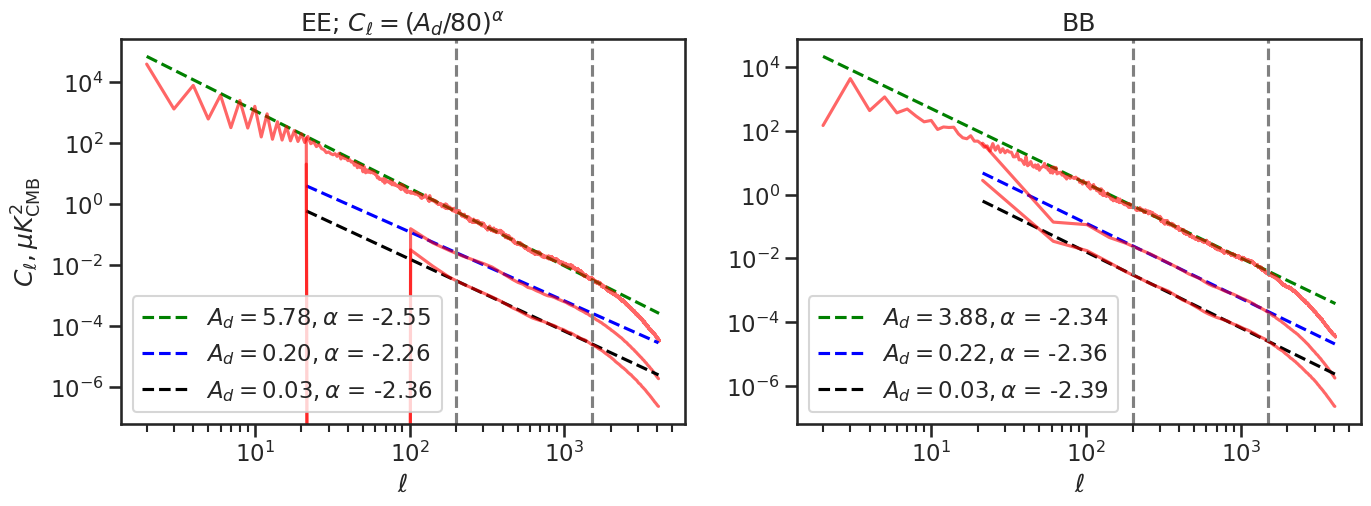

In [84]:
fit_power_law(cl_full_3amin, cl_80p_3amin, cl_40p_3amin)

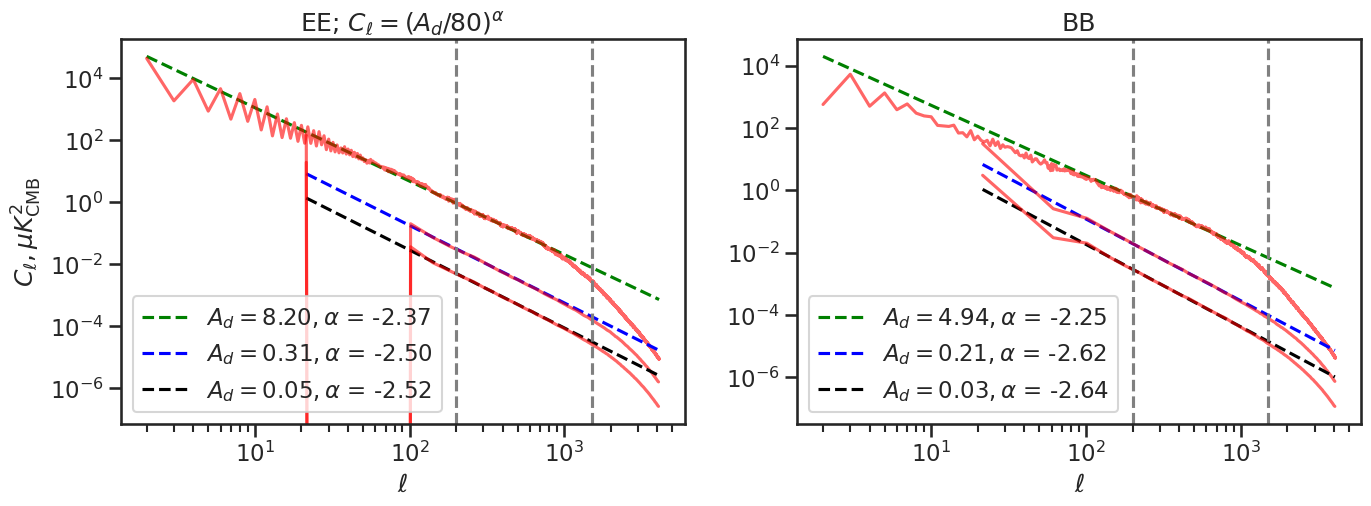

In [85]:
# poltens
fit_power_law(cl_full_3amin_pt, cl_80p_pd_3amin, cl_40p_pd_3amin)

## cls for a small sky-patch (BICEP/KECK patch, southpole patch)

In [86]:
maskbk= hp.read_map(bkmaskfile , verbose=False)
idx = np.where((maskbk < 0) | (~np.isfinite(maskbk)))
maskbk [idx] = 0

In [87]:
maps_12amin_512 = np.array((hp.ud_grade(maps_12amin[0], nside_out = 512), hp.ud_grade(maps_12amin[1], nside_out = 512)))

In [88]:
ells_uncoupled, cl_80amin_bk = cl_nmt(512, maskbk, maps_80amin_512, 1000, 20, dl=True, w22_file = '/pscratch/sd/j/jianyao/w22_512_bicep.fits')
ells_uncoupled, cl_3amin_bk = cl_nmt(512, maskbk, maps_3amin_512, 1000, 20, dl=True, w22_file = '/pscratch/sd/j/jianyao/w22_512_bicep.fits')
ells_uncoupled, cl_3amin_pt_bk = cl_nmt(512, maskbk, poltens_3amin_512, 1000, 20, dl=True, w22_file = '/pscratch/sd/j/jianyao/w22_512_bicep.fits')

weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits
weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits
weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits


In [89]:
ells_uncoupled, cl_12amin_bk = cl_nmt(512, maskbk, maps_12amin_512, 1000, 20, dl=True, w22_file = '/pscratch/sd/j/jianyao/w22_512_bicep.fits')

weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits


In [292]:
curve_fit(model, ells_uncoupled[10:], cl_3amin_bk[3][10:])

(array([ 0.01498689, -2.27744729]),
 array([[ 3.84401013e-06, -2.03542071e-04],
        [-2.03542071e-04,  1.12935413e-02]]))

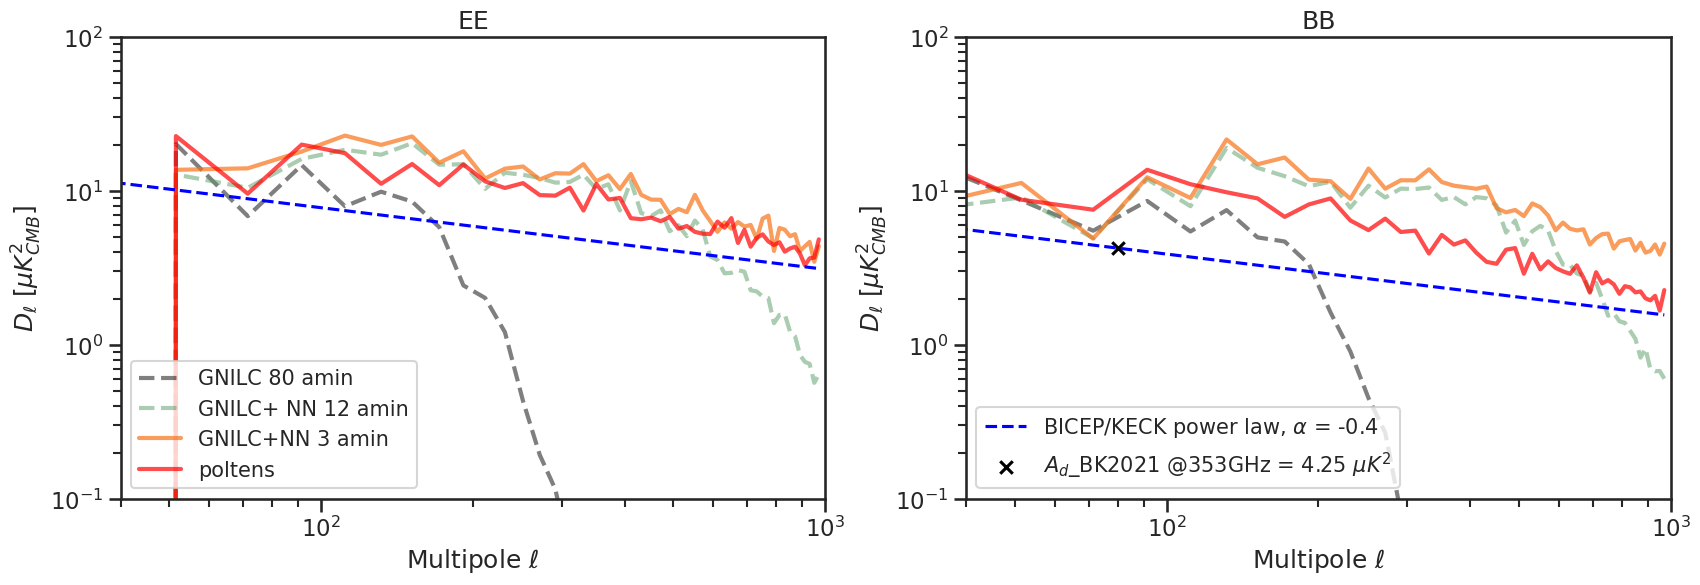

In [106]:
fig, axes = plt.subplots(1,2, figsize = (20, 6))                
names = ['EE', 'BB']
for i in range(2):
    if i == 0:
        axes[i].loglog(ells_uncoupled, cl_80amin_bk[i*3],  '--', lw=3, color='Black', alpha=0.5, label = 'GNILC 80 amin')
        axes[i].loglog(ells_uncoupled, cl_12amin_bk[i*3], '--', label='GNILC+ NN 12 amin', lw=3, color='#569A62', alpha=0.5)
        axes[i].loglog(ells_uncoupled, cl_3amin_bk[i*3], '-', label='GNILC+NN 3 amin', lw=3, color='#F87217', alpha=0.7)
        axes[i].loglog(ells_uncoupled, cl_3amin_pt_bk[i*3], '-', label='poltens', lw=3, color='red', alpha=0.7)
    else:
        axes[i].loglog(ells_uncoupled, cl_80amin_bk[i*3],  '--', lw=3, color='Black', alpha=0.5)
        axes[i].loglog(ells_uncoupled, cl_12amin_bk[i*3], '--', lw=3, color='#569A62', alpha=0.5)
        axes[i].loglog(ells_uncoupled, cl_3amin_bk[i*3], '-', lw=3, color='#F87217', alpha=0.7)
        axes[i].loglog(ells_uncoupled, cl_3amin_pt_bk[i*3], '-', lw=3, color='red', alpha=0.7)       
    
    axes[i].set_ylim(1e-1, 1e2)
    axes[i].set_xticks([40, 100, 400, 1000])
    axes[i].set_title('%s'%names[i], fontsize=18)
    axes[i].set_xlabel(r'Multipole $\ell$', fontsize=18)
    axes[i].set_ylabel(r'$D_\ell$ [$\mu K_{CMB}^2$]', fontsize=18)  
    axes[i].set_xlim(40,1e3) 
    
axes[0].legend(fontsize = 15, loc = 'lower left')
axes[1].loglog(ells_uncoupled, model(ells_uncoupled, 4.25, -0.4), 'b--', label = r'BICEP/KECK power law, $\alpha$ = -0.4')
axes[0].loglog(ells_uncoupled, model(ells_uncoupled, 4.25, -0.4)*2, 'b--', label = 'BICEP/KECK power law')
axes[1].scatter([80.], [4.25], color='k', marker='x',  label=r'$A_d$_BK2021 @353GHz = 4.25 ${\mu K}^2$')
axes[1].legend(fontsize = 15, loc = 'lower left')


# r_d

In [107]:
from scipy.optimize import curve_fit
import matplotlib
import matplotlib.cm as cm

In [108]:
maps_3amin = np.load('/pscratch/sd/j/jianyao/gnilc_dust_template_nside512_uK_CMB_rd_0204.npy')

In [109]:
maps_3amin.shape

(2, 3145728)

In [112]:
positions = hp.pix2ang(8, np.arange(12*8**2), lonlat=True)
index = np.where(abs(positions[1]) > 35)
index_mask = np.where(abs(positions[1]) <= 35)

In [113]:
cls_mpi_NN = np.load('/global/homes/j/jianyao/Small_Scale_Foreground/cls_BB_768_ForSE3amin.npy') ## Actually the Dls!!!
cls_mpi_NN = cls_mpi_NN.reshape((768, 6))

cls_mpi_PT = np.load('/global/homes/j/jianyao/Small_Scale_Foreground/cls_BB_768_poltens3amin.npy')
cls_mpi_PT = cls_mpi_PT.reshape((768, 6))

$$C_{\ell} \propto (\ell)^{\alpha}, \alpha = -2.42$$
$$C_{\ell} \propto (\ell)^{\alpha + 2}, \alpha + 2 = -0.42$$

In [115]:
def model(ell, A):
    out = A * (ell/80)**(-0.42) # for Dls
    
    return out

# ell_ini = np.array((40,70,110,160,220,290))
# ell_end = np.array((69,109,159,219,289,369))

ell_ini = np.array((40,70))
ell_end = np.array((69,109)) # fit the power law only for the first two bandpowers

b_rd = nmt.NmtBin.from_edges(ell_ini, ell_end, is_Dell=True)
ells_rd = b_rd.get_effective_ells()
def cl_nmt_rd(msk_apo, map_QU):
    '''
    nside:
    msk_apo: apodized mask
    nlbins: ell-number in each bin
    '''
    
    f2 = nmt.NmtField(msk_apo, [map_QU[0], map_QU[1]], purify_b=False)
    cl22 = nmt.compute_full_master(f2, f2, b_rd)

    return cl22

def fit_power_law(cl_mpi):
    ells_rd = b_rd.get_effective_ells()
    A_d_BB_full = []
    rd_full = np.zeros(12*8**2)
    for i in range(768):
        (A_d_BB_i,), cov = curve_fit(model, ells_rd, cl_mpi[i][0:2])
        A_d_BB_full.append(A_d_BB_i)
        rd_full[i] = A_d_BB_i*0.03952**2/(0.0671) # scale ABB_fit obtained from 353GHz to 150GHz by using factor 0.03952 as in PIP XXX
        
    return A_d_BB_full, rd_full

In [129]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [116]:
Ad_NN, rd_NN = fit_power_law(cls_mpi_NN)
Ad_PT, rd_PT = fit_power_law(cls_mpi_PT)

In [117]:
norm = matplotlib.colors.Normalize(vmin=-2, vmax=1, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.jet)

c_rd_bicep = mapper.to_rgba(np.log10(0.238))

In [118]:
rd_NN[725]

0.2509179167603929

In [119]:
rd_PT[725]

0.25097764013340734

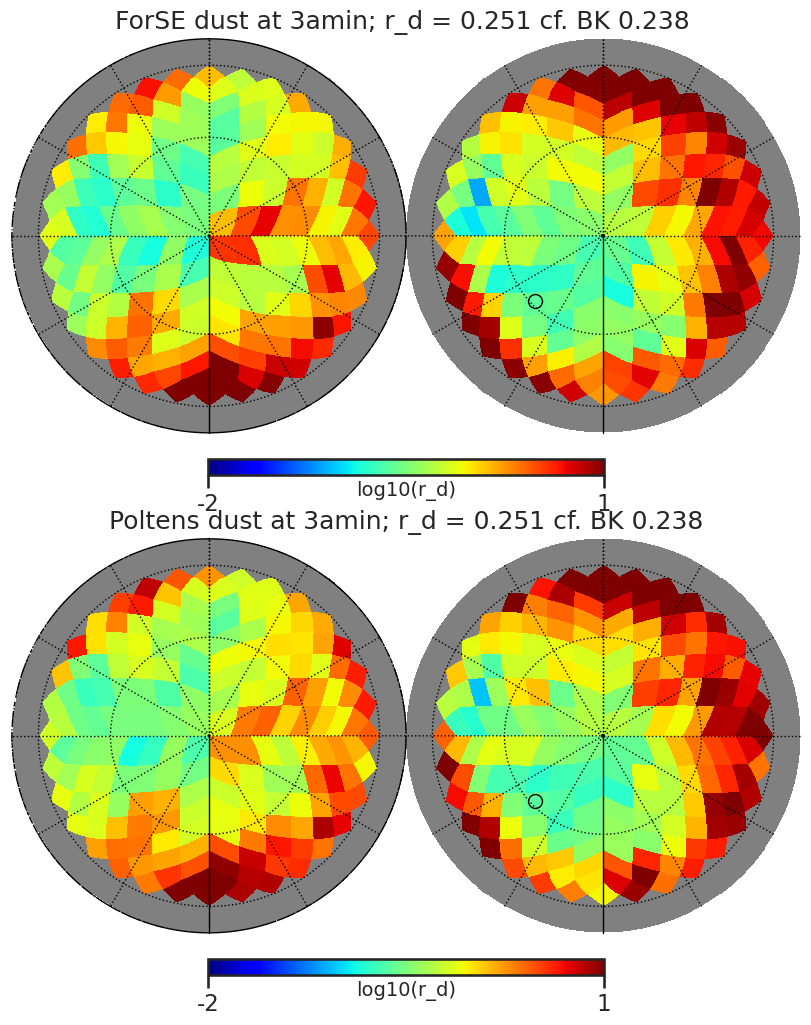

In [122]:
rd_log10_NN = np.log10(rd_NN)
rd_log10_NN[index_mask[0]] = hp.UNSEEN

rd_log10_PT = np.log10(rd_PT)
rd_log10_PT[index_mask[0]] = hp.UNSEEN
plt.figure(figsize = (8, 10))
hp.orthview(rd_log10_NN, rot = [0,90], cmap = 'jet', min = -2, max = 1, unit = 'log10(r_d)', title = 'ForSE dust at 3amin; r_d = %.3f cf. BK 0.238 '%rd_NN[725], sub = 211)
plt.scatter(np.deg2rad(37.5), np.deg2rad(-19), color=c_rd_bicep, marker="o", linewidth=1, s=100, edgecolors='k');

hp.orthview(rd_log10_PT, rot = [0,90], cmap = 'jet', min = -2, max = 1, unit = 'log10(r_d)', title = 'Poltens dust at 3amin; r_d = %.3f cf. BK 0.238'%rd_PT[725], sub = 212)
hp.graticule(dpar = 30)
# hp.projtext(-58.3, 316.1, '.028')

plt.scatter(np.deg2rad(37.5), np.deg2rad(-19), color=c_rd_bicep, marker="o", linewidth=1, s=100, edgecolors='k');
# plt.text(np.deg2rad(37.5), np.deg2rad(-19), 'BK r_d=0.24', fontsize = 10)

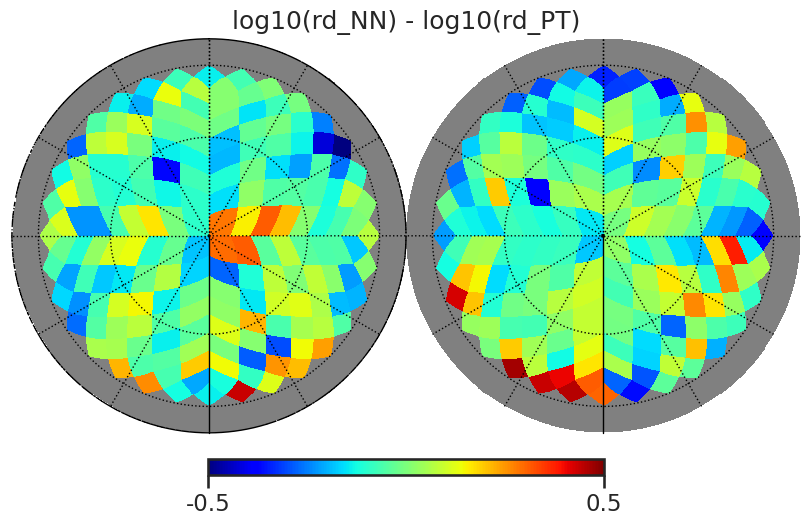

In [123]:
rd_log10_NN = np.log10(rd_NN)
rd_log10_PT = np.log10(rd_PT)

rd_diff = rd_log10_NN - rd_log10_PT
rd_diff[index_mask[0]] = hp.UNSEEN

plt.figure(figsize = (8, 10))
hp.orthview(rd_diff, rot = [0,90], min = -0.5, max = 0.5, cmap = 'jet', title = 'log10(rd_NN) - log10(rd_PT)', sub = 211)
hp.graticule(dpar = 30)

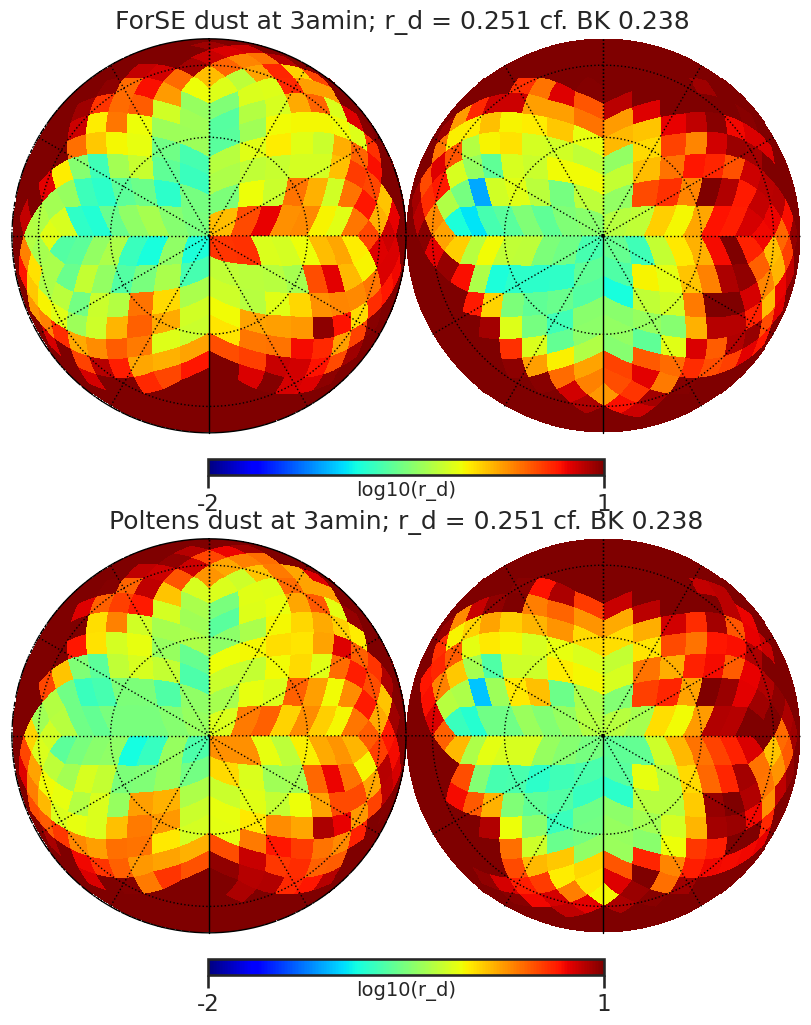

In [124]:
plt.figure(figsize = (8, 10))
hp.orthview(np.log10(rd_NN), rot = [0,90], cmap = 'jet', min = -2, max = 1, unit = 'log10(r_d)', title = 'ForSE dust at 3amin; r_d = %.3f cf. BK 0.238 '%rd_NN[725], sub = 211)
hp.orthview(np.log10(rd_PT), rot = [0,90], cmap = 'jet', min = -2, max = 1, unit = 'log10(r_d)', title = 'Poltens dust at 3amin; r_d = %.3f cf. BK 0.238'%rd_PT[725], sub = 212)
hp.graticule(dpar = 30)


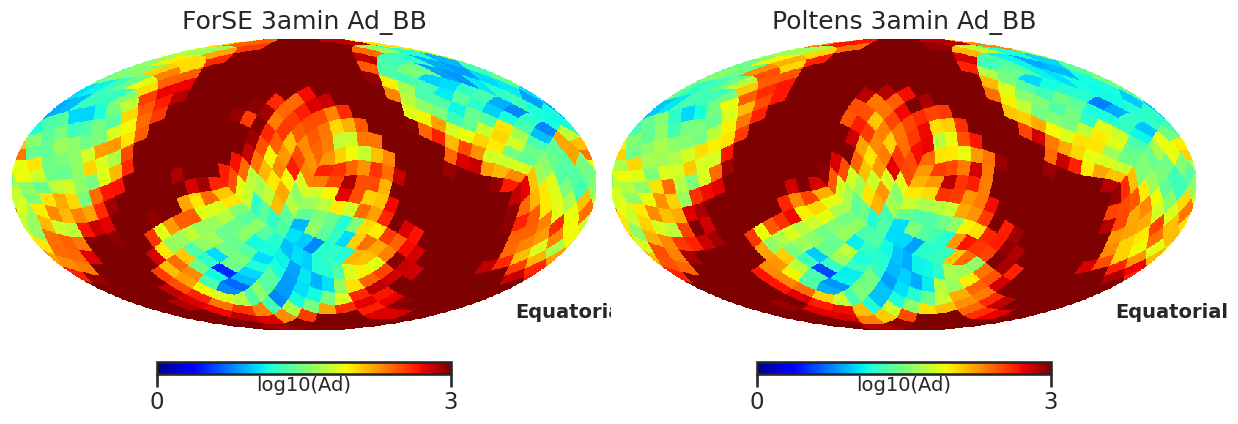

In [125]:
plt.figure(figsize = (12, 6))
hp.mollview(np.log10(Ad_NN), cmap = 'jet', min = 0, max = 3, coord = ['G', 'C'], sub = 121, unit = 'log10(Ad)',title ='ForSE 3amin Ad_BB')
hp.mollview(np.log10(Ad_PT), cmap = 'jet', min = 0, max = 3, coord = ['G', 'C'], sub = 122, unit = 'log10(Ad)',title ='Poltens 3amin Ad_BB')

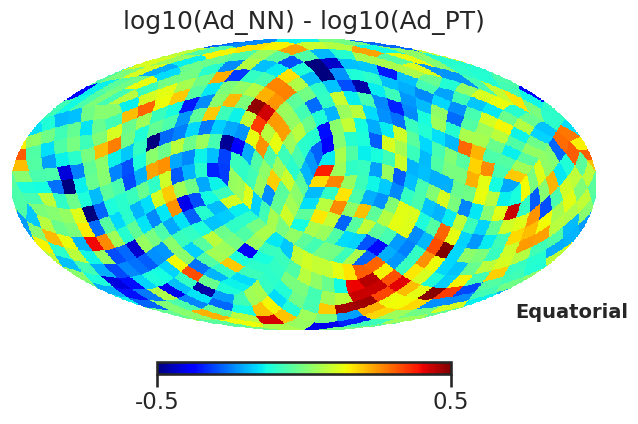

In [126]:
plt.figure(figsize = (12, 6))
hp.mollview(np.log10(Ad_NN) - np.log10(Ad_PT), cmap = 'jet', min = -0.5, max = 0.5, coord = ['G', 'C'], sub = 121, title = 'log10(Ad_NN) - log10(Ad_PT)')

(array([25., 65., 50., 33., 20., 14., 16., 10.,  9., 12.,  8.,  4.,  6.,
         6.,  3.,  2.,  7.,  4.,  3.,  3.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 [<matplotlib.patches.Polygon at 0x14ab78d196a0>])

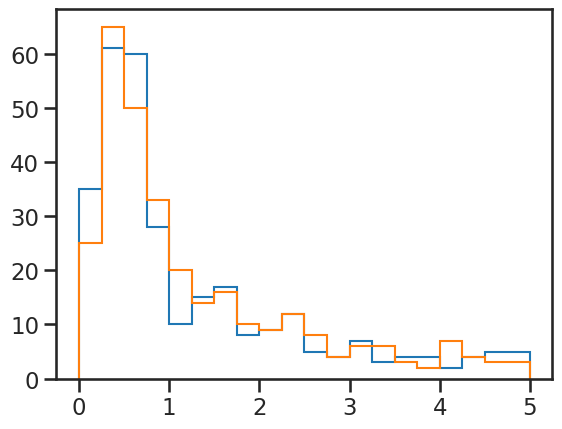

In [127]:
plt.hist(rd_NN[index[0]], bins = 20, range = [0, 5], histtype='step')
plt.hist(rd_PT[index[0]], bins = 20, range = [0, 5], histtype='step')

# Ratio

- mean([55,90].^(-0.42))/mean([135,190,255,330].^(-0.42))

In [11]:
np.mean((55, 90))**(-0.42)/np.mean((135,190,255,330))**(-0.42)

1.6165540339664453

In [201]:
ratios_NN = np.mean(cls_mpi_NN[:, 0:2], axis = 1)/np.mean(cls_mpi_NN[:, 2:6], axis = 1)
ratios_PT = np.mean(cls_mpi_PT[:, 0:2], axis = 1)/np.mean(cls_mpi_PT[:, 2:6], axis = 1)

In [202]:
np.mean(cls_mpi_PT[7][0:2])/np.mean(cls_mpi_PT[7][2:6])

2.2791038517223545

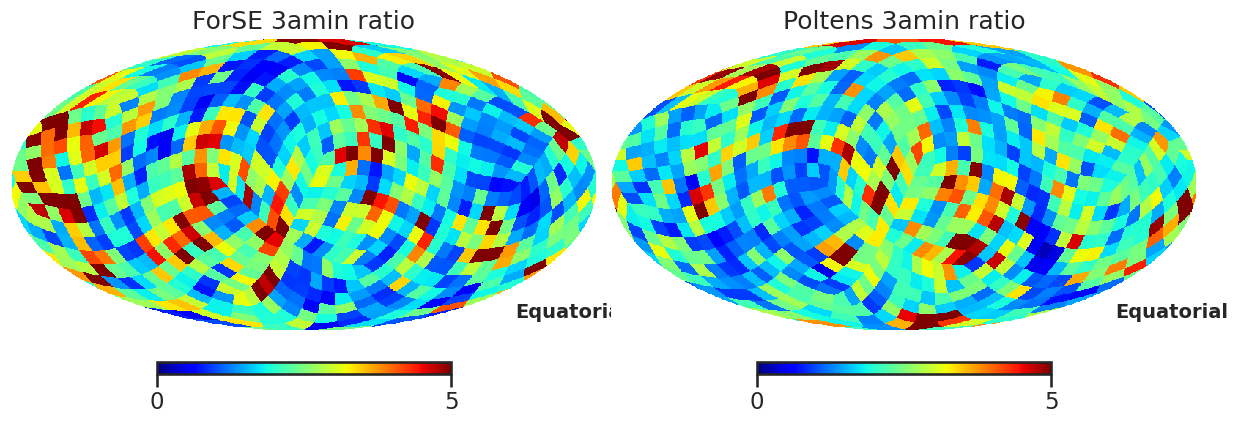

In [204]:
plt.figure(figsize = (12, 6))
hp.mollview(ratios_NN, cmap = 'jet', min = 0, max = 5, coord = ['G', 'C'], sub = 121, title ='ForSE 3amin ratio')
hp.mollview(ratios_PT, cmap = 'jet', min = 0, max = 5, coord = ['G', 'C'], sub = 122, title ='Poltens 3amin ratio')

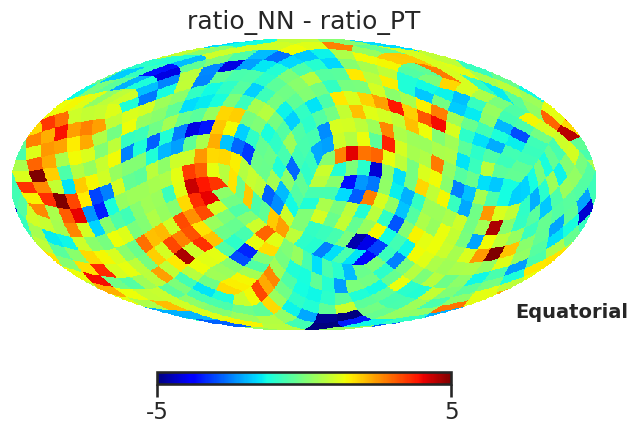

In [206]:
plt.figure(figsize = (12, 8))
hp.mollview(ratios_NN - ratios_PT, cmap = 'jet', min = -5, max = 5, coord = ['G', 'C'], sub = 121, title ='ratio_NN - ratio_PT')

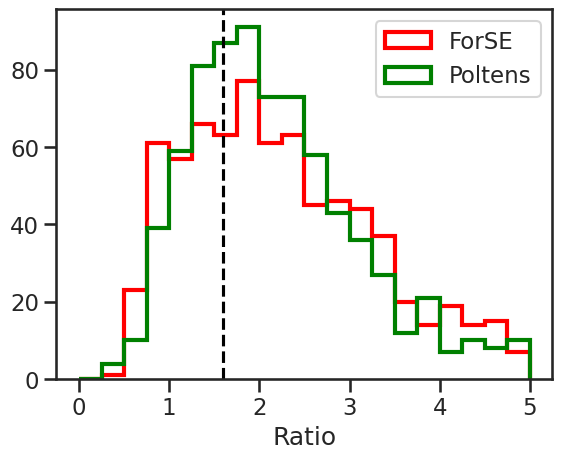

In [250]:
plt.hist(ratios_NN, bins = 20, range = [0, 5], histtype='step', color = 'red', lw = 3, label = 'ForSE')
plt.hist(ratios_PT, bins = 20, range = [0, 5], histtype='step', color = 'green', lw = 3, label = 'Poltens')
plt.axvline(1.6, color = 'k', ls = '--')
plt.xlabel('Ratio')
plt.legend()

# animation for each patch

In [ ]:
ell_ini_t = np.array((40,70,110,160,220,290))
ell_end_t = np.array((69,109,159,219,289,369))
b_rd_t = nmt.NmtBin.from_edges(ell_ini_t, ell_end_t, is_Dell=True)
ells_rd_t = b_rd_t.get_effective_ells()
n_color = 3

## power law and ratio

In [234]:
for i in range(0, 768, 20):
    
    plt.figure(figsize = (12, 5))
    plt.subplot(121)
    plt.ylim(0.1, 1e5)
    plt.ylabel(r'$C_\ell$')
    plt.xlabel(r'Multipole $\ell$', fontsize = 15)
    
    plt.text(160, 0.4, 'ratio = %.2f'%ratios_NN[i])
    plt.title('ForSE $C_\ell$ on patch_%03d'%i)

    plt.loglog(ells_rd_t, model(ells_rd_t, Ad_NN[i]), 'b--', lw = '3')
    plt.scatter(ells_rd_t, cls_mpi_NN[i], color = cycle[n_color])
    
    plt.subplot(122)
    plt.xlabel(r'Multipole $\ell$', fontsize = 15)
    plt.title('Poltens $C_\ell$ on patch_%03d'%i)
    plt.ylim(0.1, 1e5)
    plt.text(160, 0.4, 'ratio = %.2f'%ratios_PT[i])

    plt.loglog(ells_rd_t, model(ells_rd_t, Ad_PT[i]), 'b--', lw = '3')
    plt.scatter(ells_rd_t, cls_mpi_PT[i], color = cycle[n_color])

    plt.tight_layout()
    plt.savefig('/pscratch/sd/j/jianyao/figures/Separa_cls_small_field_power_law_%03d.png'%i, format = 'png')
    plt.close()

In [265]:
for i in range(0, 768, 20):
    
    plt.figure(figsize = (7, 5))
    plt.ylim(0.1, 1e3)
    plt.ylabel(r'$C_\ell$')
    plt.xlabel(r'Multipole $\ell$', fontsize = 15)

    plt.loglog(ells_rd_t, model(ells_rd_t, Ad_NN[i]), '--', c = 'red', lw = '3')
    plt.scatter(ells_rd_t, cls_mpi_NN[i], color = 'red', label = 'ForSE, ratio = %.2f'%ratios_NN[i])

    plt.xlabel(r'Multipole $\ell$', fontsize = 15)
    plt.ylim(0.1, 1e5)

    plt.loglog(ells_rd_t, model(ells_rd_t, Ad_PT[i]), 'g--', lw = '3')
    plt.scatter(ells_rd_t, cls_mpi_PT[i], color = 'green', label = 'poltens, ratio = %.2f'%ratios_PT[i])
    
    plt.title('$C_\ell$ on patch_%03d'%i)
    plt.legend()
    plt.tight_layout()
    plt.savefig('/pscratch/sd/j/jianyao/figures/Toge_cls_small_field_power_law/Toge_cls_small_field_power_law_%03d.png'%i, format = 'png')
    plt.close()

In [196]:
import imageio

In [262]:
with imageio.get_writer('/pscratch/sd/j/jianyao/figures/Separa_small_field_ps.gif', mode='i', fps = 0.8) as writer:
    for i in range(0, 768, 20):
        image = imageio.imread('/pscratch/sd/j/jianyao/figures/Separa_cls_small_field_power_law/Separa_cls_small_field_power_law_%03d.png'%i) #dirnames[i]
        writer.append_data(image)

/tmp/ipykernel_214345/246659543.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('/pscratch/sd/j/jianyao/figures/Separa_cls_small_field_power_law/Separa_cls_small_field_power_law_%03d.png'%i) #dirnames[i]


In [266]:
with imageio.get_writer('/pscratch/sd/j/jianyao/figures/Toge_small_field_ps.gif', mode='i', fps = 0.8) as writer:
    for i in range(0, 768, 20):
        image = imageio.imread('/pscratch/sd/j/jianyao/figures/Toge_cls_small_field_power_law/Toge_cls_small_field_power_law_%03d.png'%i) #dirnames[i]
        writer.append_data(image)

/tmp/ipykernel_214345/2893093640.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('/pscratch/sd/j/jianyao/figures/Toge_cls_small_field_power_law/Toge_cls_small_field_power_law_%03d.png'%i) #dirnames[i]


## patch position

In [270]:
from NPTFit import create_mask

In [293]:
positions = hp.pix2ang(8, np.arange(12*8**2), lonlat=True)

for i in range(0, 768, 20):
# for i in range(0, 1):

    mask_i = create_mask.make_mask_total(nside = 256, mask_ring = True, inner = 0, outer = 11.3, ring_l = positions[0][i], ring_b = positions[1][i])
    
    mask_i = np.logical_not(mask_i)*1
    mask_apodized = nmt.mask_apodization(mask_i, 2., apotype="Smooth")
    mask_apodized[mask_apodized == 0] = hp.UNSEEN
    
    mask_ipix = hp.mollview(mask_apodized, return_projected_map=True, min = 0, max = 1, title = 'patch_%03d'%i)
    plt.savefig('/pscratch/sd/j/jianyao/figures/mask_i_patch/mask_patch_%03d.png'%i, format = 'png')
    plt.close()


In [294]:
with imageio.get_writer('/pscratch/sd/j/jianyao/figures/Mask_patch.gif', mode='i', fps = 0.8) as writer:
    for i in range(0, 768, 20):
        image = imageio.imread('/pscratch/sd/j/jianyao/figures/mask_i_patch/mask_patch_%03d.png'%i)
        writer.append_data(image)

/tmp/ipykernel_214345/1640943091.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('/pscratch/sd/j/jianyao/figures/mask_i_patch/mask_patch_%03d.png'%i)


# definitions of function

In [17]:
def cl_anafast(map_QU, lmax):
    '''
    Return the full-sky power spetra, except monopole and dipole
    '''

    map_I = np.ones_like(map_QU[0])
    maps = np.row_stack((map_I, map_QU))
    cls_all = hp.anafast(maps, lmax = lmax)
    ells = np.arange(lmax+1)

    return ells[2:], cls_all[:, 2:]

def cl_nmt(nside, msk_apo, map_QU, lmax, nlbins, dl = False, w22_file = 'w22_2048_80_sky.fits'):
    '''
    nside:
    msk_apo: apodized mask
    nlbins: ell-number in each bin
    '''
    
    binning = nmt.NmtBin(nside=nside, nlb=nlbins, lmax=lmax, is_Dell=dl)
    f2 = nmt.NmtField(msk_apo, [map_QU[0], map_QU[1]], purify_b=True)

    w22 = nmt.NmtWorkspace()
    try:
        w22.read_from(w22_file)
        print('weights loaded from %s' % w22_file)
    except:
        w22.compute_coupling_matrix(f2, f2, binning)
        w22.write_to(w22_file)
        print('weights writing to disk')

    cl22 = nmt.compute_full_master(f2, f2, binning, workspace = w22)
    
    return binning.get_effective_ells(), cl22
    
def plot_spectra(cls_all, names, save_dir, lim = [1e-9, 1e3]):

    '''
    cls_80p_80amin = {'ells':ell_80p_80amin, 'spectra':cl_80p_80amin, 'color':'r-', 'label':'80amin'}
    cls_80p_12amin = {'ells':ell_80p_12amin, 'spectra':cl_80p_12amin, 'color':'g-', 'label':'12amin'}
    '''
    names = ['EE', 'BB']
    fig, axes = plt.subplots(1,2, figsize = (16, 5))

    for i in range(len(cls_all)):
        ells = cls_all[i]['ells']; cl = cls_all[i]['spectra']; color = cls_all[i]['color']; label = cls_all[i]['label']
        axes[0].loglog(ells, abs(cl[0]), color, label = label)
        axes[1].loglog(ells, abs(cl[3]), color)

    line1 = Line2D([],[],linestyle='-', color='r')
    line2 = Line2D([],[],linestyle='-.', color='r')
    line3 = Line2D([],[],linestyle='--', color='r')
    axes[0].legend(loc = 'lower left')
    axes[1].legend([line1, line2, line3],['full sky', '80% sky', '40% sky'], loc = 'lower left')

    for j in range(2):
        axes[j].set_ylim(lim[0], lim[1])
        axes[j].set_title('%s'%names[j])
        if j == 0:
            axes[j].set_ylabel(r'C$\ell$')
        axes[j].set_xlabel(r'$\ell$')

    if save_dir:
        plt.savefig(save_dir, format = 'pdf')  


In [39]:
def run_anafast(m, lmax):
    clanaf = hp.anafast(m, lmax=lmax)
    cl = {}
    cl["TT"] = clanaf[0]
    cl["EE"] = clanaf[1]
    cl["BB"] = clanaf[2]
    cl["TE"] = clanaf[3]
    ell = np.arange(lmax + 1)

    cl_norm = ell * (ell + 1) / np.pi / 2
    cl_norm[0] = 1
    return ell, cl_norm, cl


def run_namaster(m, mask, lmax, nlbins):
    """Compute C_ell with NaMaster
    Parameters
    ----------
    m : numpy array
        T only or TQU HEALPix map
    mask : numpy array
        mask, 1D, 0 for masked pixels,
        needs to have same Nside of the input map
    lmax : int
        maximum ell of the spherical harmonics transform
    Returns
    -------
    ell : numpy array
        array of ell from 0 to lmax (length lmax+1)
    cl_norm : numpy array
        ell (ell+1)/2pi factor to turn C_ell into D_ell
        first element is set to 1
    cl : dict of numpy arrays
        dictionary of numpy arrays with all components
        of the spectra, for now only II, EE, BB, no
        cross-spectra
    """

    nside = hp.npix2nside(len(mask))
    # b = nmt.NmtBin.from_nside_linear(nside, 16)
    # leff = b.get_effective_ells()
    binning = nmt.NmtBin(nside=nside, nlb=nlbins, lmax=lmax, is_Dell=False)

    cl = {}

    if len(m) == 3:
        f_0 = nmt.NmtField(mask, [m[0]])
        f_2 = nmt.NmtField(
            mask, m[1:].copy(), purify_b=True
        )  # NaMaster masks the map in-place
        cl_namaster = nmt.compute_full_master(f_2, f_2, binning)
        cl["EE"] = np.concatenate([[0, 0], cl_namaster[0]])
        cl["BB"] = np.concatenate([[0, 0], cl_namaster[3]])
        cl_namaster = nmt.compute_full_master(f_0, f_2, binning)
        cl["TE"] = np.concatenate([[0, 0], cl_namaster[0]])
    elif m.ndim == 1:
        m = m.reshape((1, -1))
        f_0 = nmt.NmtField(mask, [m[0]])

    cl_namaster_I = nmt.compute_full_master(f_0, f_0, binning)

    cl["TT"] = np.concatenate([[0, 0], cl_namaster_I[0]])
    ell = np.concatenate([[0, 1], binning.get_effective_ells()])
    cl_norm = ell * (ell + 1) / np.pi / 2
    cl_norm[0] = 1
    return ell, cl_norm, cl